In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [14]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [15]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [16]:
df1=pd.read_csv("../포스코케미칼 공매도.csv")

In [17]:
df2=df1.drop(labels=range(0,258),axis=0)

In [18]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)  공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                            
2020-03-13      161459       1982179  7690696950  9.573925e+10
2020-03-12       81441       1940769  4229068300  9.975553e+10
2020-03-11       51136       2070502  2789186000  1.120140e+11
2020-03-10       44406       2126376  2459283300  1.195020e+11
2020-03-09      140453       2217730  7930124700  1.233060e+11
...                ...           ...         ...           ...
2016-07-06        1086             0    10894830  0.000000e+00
2016-07-05        2937         12688    29576980  1.268800e+08
2016-07-04        1283         16959    13277550  1.746777e+08
2016-07-01        2794         17154    29179900  1.792593e+08
2016-06-30       10449         17070   108115400  1.766745e+08

[909 rows x 4 columns]


In [19]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-07-01,1.210,1152.6,2794,17154,29179900,1.792593e+08
2016-07-04,1.224,1147.5,1283,16959,13277550,1.746777e+08
2016-07-05,1.217,1148.1,2937,12688,29576980,1.268800e+08
2016-07-06,1.203,1153.0,1086,0,10894830,0.000000e+00
2016-07-07,1.208,1165.8,794,0,8021350,0.000000e+00
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,140453,2217730,7930124700,1.233060e+11
2020-03-10,1.082,1201.4,44406,2126376,2459283300,1.195020e+11
2020-03-11,1.086,1196.7,51136,2070502,2789186000,1.120140e+11


In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

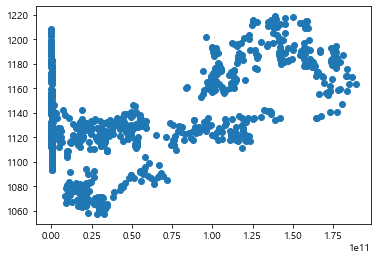

In [20]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [21]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.5278787330357952, 2.7417145831960455e-66)

In [22]:
spearmanr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

SpearmanrResult(correlation=0.3263717792263899, pvalue=5.589492448134156e-24)

Text(0.5, 1.0, '포스코케미칼 공매도 금액과 환율')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '환율($->\\)')

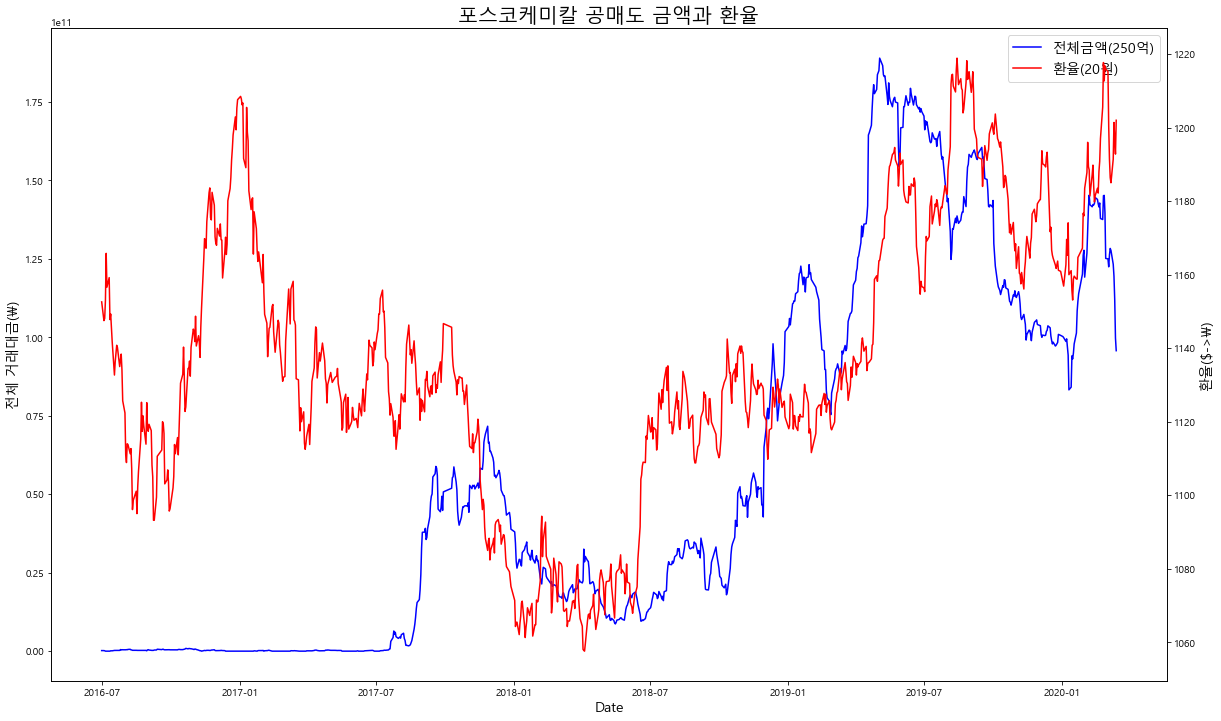

In [24]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(잔고금액)'], label='전체금액(250억)', color='b')
line2=ax2.plot(df3['달러환율'],label='환율(20원)', color='r')


ax.set_title('포스코케미칼 공매도 금액과 환율', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('환율($->\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()